### Problem Setup

In [79]:
import scipy.linalg as lila
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("credit_card_data.csv", index_col=False)
df = df.iloc[:, 1:]
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [81]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

df = df.dropna()

In [82]:
from  scipy.stats import zscore
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [83]:
df.shape

(7190, 17)

In [88]:
class PCA:
    def __init__(self, n_components = 0.95):
        self.n_components = n_components
        self.cumsum = []
        if self.n_components > 1.0:
            self.type = 'solid'
        else:
            self.type = 'ratio'
    
    def fit(self, X):
        row_dim, col_dim = X.shape
        
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        self.std = np.std(X, axis=0)
        X = X / self.std
        
        
        # Step 1: Perform Eigen Decomposition for X
        A = np.array(X)
        
        # Compute Covariance matrix
        cov = np.cov(A.T)
        
        self.eigen_values, self.eigen_vectors = eig(cov)
        
        self.eigen_values = self.eigen_values / sum(self.eigen_values)
        
        desc_ord = np.flip(np.argsort(self.eigen_values))
        
        self.eigen_values = self.eigen_values[desc_ord]
        self.eigen_vectors = self.eigen_vectors[:, desc_ord]
        
        if self.type == 'ratio':
            sum_v = 0
            n_comp = 0
            i = 0
            self.cumsum.append(0)
            while sum_v < self.n_components:
                sum_v += self.eigen_values[i]
                self.cumsum.append(sum_v)
                i+=1
                n_comp += 1
            
            self.eigen_values = self.eigen_values[:n_comp]
            self.eigen_vectors = self.eigen_vectors[:, :n_comp]
        else:
            self.eigen_values = self.eigen_values[:self.n_components]
            self.eigen_vectors = self.eigen_vectors[:, :self.n_components]
        return X @ self.eigen_vectors
    
    def getcumSum(self):
        return self.cumsum
    
    def transform(self, X):
        X = X - self.mean
        X = X/self.stdv
        
        return X @ self.eigen_vectors 

In [100]:
pca_section = PCA(n_components=8)
X_transofmed = pca_section.fit(df)
X_transofmed.shape

(7190, 8)

In [101]:
X_transofmed

,0,1,2,3,4,5,6,7
0,1.303382,2.126307,0.276408,-0.598291,-0.024294,0.278706,0.701748,0.277828
1,2.850911,-3.158979,0.474566,1.511200,-1.795840,-0.138002,-0.339325,-0.375183
2,-1.182419,-0.535999,1.429170,-2.083881,0.427127,-0.141365,-1.682668,0.207192
4,1.438825,1.535476,0.294136,-1.187602,0.159497,0.388394,0.344881,-0.122156
5,-0.832787,-0.160728,-2.211831,-1.111797,-0.673545,-0.995670,1.579250,-0.848839
...,...,...,...,...,...,...,...,...
8876,0.979298,1.426232,1.235282,1.279344,3.758451,-2.795736,-0.112546,0.157403
8877,0.183628,2.286286,-0.956238,1.325063,3.106958,-3.217432,-0.372702,0.462975
8878,2.566233,1.280481,0.599971,1.564285,2.735867,-3.299751,0.138588,0.205744
8879,0.118862,2.005995,-1.036362,1.111482,3.192060,-3.123083,-0.313323,0.335743


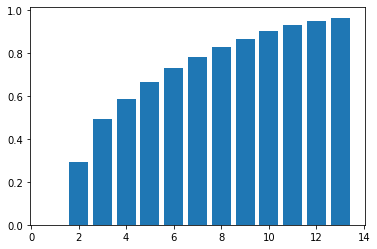

In [99]:
plt.bar(np.arange(1, len(X_transofmed.T) + 2), pca_section.getcumSum())
plt.show()